In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn  
import seaborn

In [129]:
%matplotlib inline

In [130]:
data = pd.read_csv("cereals.csv")
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1.00
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.50
4,Almond_Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75


Sugar, potass, carbo have negative values, meaning missing data

In [131]:
for x in data:
    if x not in ["name", "mfr", "type", "shelf", "vitamins"]:
        data[x] = (data[x] / data.cups).round()

In [132]:
data = data.replace(to_replace=-1, value=np.nan)

In [133]:
data = data.interpolate()
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,212,12,3,394,30,15,18,848.0,25,3,3,1
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135.0,0,3,1,1
2,All-Bran,K,C,212,12,3,788,27,21,15,970.0,25,3,3,1
3,All-Bran_with_Extra_Fiber,K,C,100,8,0,280,28,16,0,660.0,25,3,2,1
4,Almond_Delight,R,C,147,3,3,267,1,19,11,376.5,25,3,1,1


In [134]:
# now we need to normalize the data

In [135]:
data.potass = data.potass / 1000
data.sodium = data.sodium / 1000


In [136]:
data[data.vitamins == 0]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
1,100%_Natural_Bran,Q,C,120,3,5,0.015,2,8.0,8,0.135,0,3,1,1
20,Cream_of_Wheat_(Quick),N,H,100,3,0,0.080,1,21.0,0,0.175,0,2,1,1
54,Puffed_Rice,Q,C,50,1,0,0.000,0,13.0,0,0.015,0,3,0,1
55,Puffed_Wheat,Q,C,50,2,0,0.000,1,10.0,0,0.050,0,3,0,1
57,Quaker_Oatmeal,Q,H,149,7,3,0.000,4,23.5,14,0.164,0,1,1,1
63,Shredded_Wheat,N,C,80,2,0,0.000,3,16.0,0,0.095,0,1,1,1
64,Shredded_Wheat_'n'Bran,N,C,134,4,0,0.000,6,28.0,0,0.209,0,1,1,1
65,Shredded_Wheat_spoon_size,N,C,134,4,0,0.000,4,30.0,0,0.179,0,1,1,1


I don't think these cereals actually have no vitamins in them, especially something like shredded wheat. Also, 100 vitamins seems unlikely. I'm going to delete the vitamins column as I believe most cereals have similar added vitamins. I also don't believe we ever categorize cereals by their vitamin content.

In [137]:
data = data.drop('vitamins', axis=1)

In [138]:
data = data.drop('weight', axis=1)

I also don't want the particular manufacturer influencing the clustering of the cereals. Afterwards, it will be interesting to analyze whether manufacturers tend to produce similar types of cereals without this actually affecting the clustering.

In [139]:
data = data.drop('mfr', axis=1)

In [140]:
data = data.replace(to_replace="H", value=1)
data = data.replace(to_replace="C", value=0)

Gave hot and cold cereals an integer value

In [141]:
data.index = data.pop("name")

In [142]:
data.head()

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,shelf,cups
name,,,,,,,,,,,
100%_Bran,0,212,12,3,0.394,30,15,18,0.8480,3,1
100%_Natural_Bran,0,120,3,5,0.015,2,8,8,0.1350,3,1
All-Bran,0,212,12,3,0.788,27,21,15,0.9700,3,1
All-Bran_with_Extra_Fiber,0,100,8,0,0.280,28,16,0,0.6600,3,1
Almond_Delight,0,147,3,3,0.267,1,19,11,0.3765,3,1


In [143]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

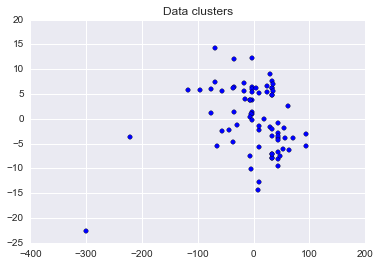

In [144]:
pca = PCA(n_components=2)
pca.fit(data)
reduced_data = pca.transform(data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title("Data clusters")
plt.show()

In [145]:
kmeans = KMeans(3)
y_pred = kmeans.fit_predict(reduced_data)


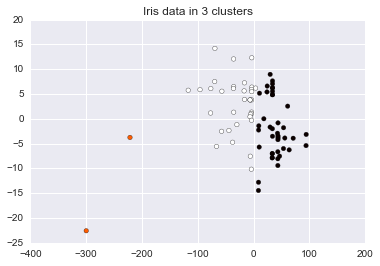

In [146]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_pred, cmap="hot")
plt.title("Iris data in 3 clusters")
plt.show()

In [147]:
data['clusters'] = y_pred

In [162]:
data.loc[data.clusters == 0].head()

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,shelf,cups,clusters
name,,,,,,,,,,,,
100%_Bran,0,21.2,12,3,0.394,30,15,18,0.848,3,1,0
All-Bran,0,21.2,12,3,0.788,27,21,15,0.970,3,1,0
Basic_4,0,17.3,4,3,0.280,3,24,11,0.133,3,1,0
Clusters,0,22.0,6,4,0.280,4,26,14,0.210,3,1,0
Cracklin'_Oat_Bran,0,22.0,6,6,0.280,8,20,14,0.320,3,1,0


In [161]:
data.loc[data.clusters == 1].head()

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,shelf,cups,clusters
name,,,,,,,,,,,,
100%_Natural_Bran,0,12.0,3,5,0.015,2,8,8,0.1350,3,1,1
All-Bran_with_Extra_Fiber,0,10.0,8,0,0.280,28,16,0,0.6600,3,1,1
Almond_Delight,0,14.7,3,3,0.267,1,19,11,0.3765,3,1,1
Apple_Cinnamon_Cheerios,0,14.7,3,3,0.240,2,14,13,0.0930,1,1,1
Apple_Jacks,0,11.0,2,0,0.125,1,11,14,0.0300,2,1,1


In [126]:
data.loc[data.clusters == 2]

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,shelf,cups,clusters
name,,,,,,,,,,,,
Grape-Nuts,0,440,12,0,0.680,12,68,12,0.360,3,1,2
Great_Grains_Pecan,0,364,9,9,0.227,9,39,12,0.303,3,1,2


The first segmentation clearly segmented the cereals mainly based on calories. This is not what I want, as I believe people choose cereals on much more than just calories. I will divide calories by 10 to normalize the data. 

In [152]:
data.calories = data.calories / 10

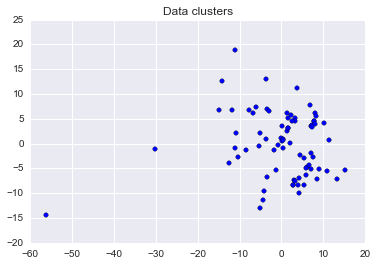

In [153]:
pca = PCA(n_components=2)
pca.fit(data)
reduced_data = pca.transform(data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title("Data clusters")
plt.show()

In [154]:
kmeans = KMeans(3)
y_pred = kmeans.fit_predict(reduced_data)


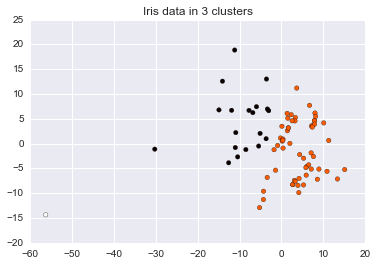

In [163]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_pred, cmap="hot")
plt.title("Iris data in 3 clusters")
plt.show()

In [155]:
data['clusters'] = y_pred

In [160]:
data.loc[data.clusters == 0].head()

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,shelf,cups,clusters
name,,,,,,,,,,,,
100%_Bran,0,21.2,12,3,0.394,30,15,18,0.848,3,1,0
All-Bran,0,21.2,12,3,0.788,27,21,15,0.970,3,1,0
Basic_4,0,17.3,4,3,0.280,3,24,11,0.133,3,1,0
Clusters,0,22.0,6,4,0.280,4,26,14,0.210,3,1,0
Cracklin'_Oat_Bran,0,22.0,6,6,0.280,8,20,14,0.320,3,1,0


In [159]:
data.loc[data.clusters == 1].head()

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,shelf,cups,clusters
name,,,,,,,,,,,,
100%_Natural_Bran,0,12.0,3,5,0.015,2,8,8,0.1350,3,1,1
All-Bran_with_Extra_Fiber,0,10.0,8,0,0.280,28,16,0,0.6600,3,1,1
Almond_Delight,0,14.7,3,3,0.267,1,19,11,0.3765,3,1,1
Apple_Cinnamon_Cheerios,0,14.7,3,3,0.240,2,14,13,0.0930,1,1,1
Apple_Jacks,0,11.0,2,0,0.125,1,11,14,0.0300,2,1,1


In [158]:
data.loc[data.clusters == 2]

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,shelf,cups,clusters
name,,,,,,,,,,,,
Grape-Nuts,0,44,12,0,0.68,12,68,12,0.36,3,1,2


Now, I'm going to include less categories. I'm going to focus on sugars, protein, fiber, and type (hot or cold).

In [164]:
data1 = data[['protein', 'sugars', 'fiber', 'type']]

In [176]:
def run_analysis(data, x):
    pca = PCA(n_components=2)
    pca.fit(data)
    reduced_data = pca.transform(data)
    kmeans = KMeans(x)
    y_pred = kmeans.fit_predict(reduced_data)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_pred, cmap="hot")
    plt.title("Iris data in 3 clusters")
    plt.show()
    data['clusters'] = y_pred
    

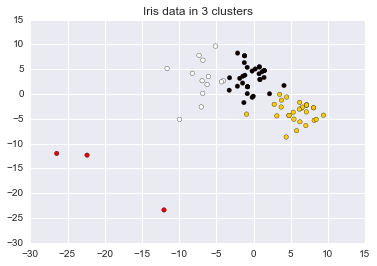

/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [177]:
run_analysis(data1, 4)

In [462]:
sugars = data1.loc[data1.clusters == 0]
sugars

,protein,sugars,fiber,type,clusters
name,,,,,
100%_Natural_Bran,3,8,2,0,0
Almond_Delight,3,11,1,0,0
Apple_Cinnamon_Cheerios,3,13,2,0,0
Apple_Jacks,2,14,1,0,0
Basic_4,4,11,3,0,0
Bran_Chex,3,9,6,0,0
Cap'n'Crunch,1,16,0,0,0
Cinnamon_Toast_Crunch,1,12,0,0,0
Cocoa_Puffs,1,13,0,0,0


In [463]:
fibers = data1.loc[data1.clusters == 1]
fibers

,protein,sugars,fiber,type,clusters
name,,,,,
100%_Bran,12,18,30,0,1
All-Bran,12,15,27,0,1
All-Bran_with_Extra_Fiber,8,0,28,0,1


In [464]:
blands = data1.loc[data1.clusters == 2]
blands

,protein,sugars,fiber,type,clusters
name,,,,,
Bran_Flakes,4,7,7,0,2
Cheerios,5,1,2,0,2
Corn_Chex,2,3,0,0,2
Corn_Flakes,2,2,1,0,2
Cream_of_Wheat_(Quick),3,0,1,1,2
Crispix,2,3,1,0,2
Double_Chex,3,7,1,0,2
Grape_Nuts_Flakes,3,6,3,0,2
Just_Right_Crunchy__Nuggets,2,6,1,0,2


In [465]:
healthies_sorta = data1.loc[data1.clusters == 3]
healthies_sorta

,protein,sugars,fiber,type,clusters
name,,,,,
Clusters,6,14,4,0,3
Cracklin'_Oat_Bran,6,14,8,0,3
"Fruit_&_Fibre_Dates,_Walnuts,_and_Oats",4,15,7,0,3
Fruitful_Bran,4,18,7,0,3
Grape-Nuts,12,12,12,0,3
Great_Grains_Pecan,9,12,9,0,3
Mueslix_Crispy_Blend,4,19,4,0,3
Oatmeal_Raisin_Crisp,6,20,3,0,3
Post_Nat._Raisin_Bran,4,21,9,0,3


These results were interesting. The four groups were characterized by: <br> <br>
1) Very high sugar and low fiber. "Unhealthy cereals"<br> It included most of the cereals we'd consider to be sweet and unhealthy including fruit loops, frosted flakes, Cap'n Crunch, Cinnamon Toast Crunch, and Lucky Charms. However, it also included a few curious inclusions from "healhty cereal" like Wheaties Honey Gold, Total Raisin Bran, Muesli, and 100% Natural Bran. I think this is a great segmentation because it highlights some cereals that we believe are healthy as perhaps not so healthy. However, it does not take into account whole grain, or good carbs vs. bad. <br> <br>
3) Low sugar cereals. <br>
These are traditional healthy cereals that are more accessible to children and perhaps more mild tasting than very high fiber cereals. They include Cheerios, Corn Flakes, Crispix, Shredded Wheat, and Special K. <br> <br>
4) High protein, sugar, and fiber cereals. Typically viewed as healthy choices.<br>
These are your tradtional "healhty" cereals in the minds of many, featuring whole grains, lots of fiber, but also likely lots of calories and sugar. They include hot oatmeal as well as classics such as Grape-Nuts and Raisen Bran. One weird outlier is Smacks, likely due to its incredible sugar quantity of 20 grams / serving. <br> <br>
2) Very high fiber cereals <br> (there are 3: 100% Bran, All-Bran, All-Bran with extra fiber). LESSON: Don't buy 100% Natural Bran! <br> <br>


In [368]:
def add_previous_columns(new_data):
    new_data = pd.concat([new_data, data], axis=1, join='inner')
    new_data = new_data.T.drop_duplicates().T
    new_data = new_data[["type","calories","protein","fat","sodium",
                 "fiber","carbo","sugars","potass","shelf"]]
    new_data.calories = new_data.calories * 10
    new_data.sodium = new_data.sodium  * 1000
    new_data.potass = new_data.potass  * 1000
    return new_data

fibers = add_previous_columns(fibers)
sugars = add_previous_columns(sugars)
blands = add_previous_columns(blands)
healthies_sorta = add_previous_columns(healthies_sorta)

In [369]:
calories = pd.DataFrame([fibers.calories.mean(), sugars.calories.mean(), 
            blands.calories.mean(), healthies_sorta.calories.mean()], 
            index= ["fibers", "sugars", "blands", "healthies"])

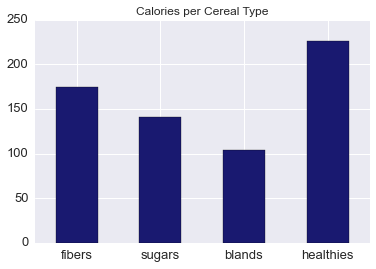

In [370]:
calories.plot(kind="bar", legend=False, 
              color='midnightblue', rot=0, fontsize=13, 
              title="Calories per Cereal Type")

In [459]:
blands_means = pd.DataFrame(blands.mean(), columns=["Group 1: Bland Cereals"])
sugars_means = pd.DataFrame(sugars.mean(), columns=["Group 2: Sugary Cereals"])
fibers_means = pd.DataFrame(fibers.mean(), columns=["Group 3: Fibery Cereals"])
healthies_means = pd.DataFrame(healthies_sorta.mean(), columns=["Group 4: Healthy Cereals"])

In [460]:
means_data = pd.concat([blands_means, sugars_means, fibers_means, healthies_means], 
                       axis=1, join='inner').drop("type").round()
means_data = means_data.T
means_data.calories = means_data.calories / 10
means_data.sodium = means_data.sodium / 100
means_data.potass = means_data.potass / 100
means_data.fat = means_data.fat 
means_data = means_data.T

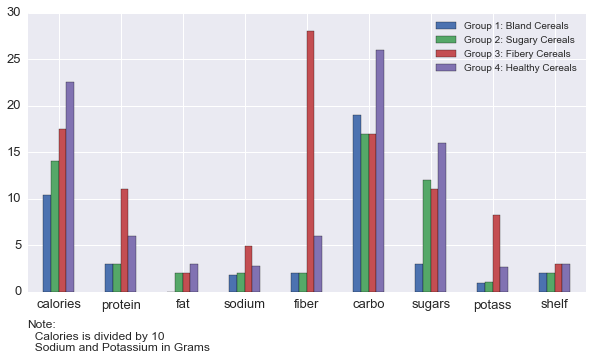

In [461]:
x = means_data.plot(kind="bar",figsize=(10,5), rot=0, fontsize=13)
x.text(0, -.10, "Note:\n  Calories is divided by 10 \n  Sodium and Potassium in Grams", transform=x.transAxes, fontsize=12,
        verticalalignment='top')


This concludes my analysis. We've found that the four distinct groups have some interesting characteristics. Many cereals we believe to be healthy are in fact highest in calories, sugar, and carbs. What makes us believe they are healthy. Likely, advertising (and perhaps whole grains). They are certainly higher in fiber, but you might as well eat one of the actual high fiber cereals if you are watching your weight.

The bland cereals area a safe choice, though void of much nutrition. They also might not keep you full. 

The sugary cereals really don't add anything to the blands and just bring extra sugar and calories. However, aside from the extra sugar, they don't seem to be that much worse for you. 